In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab
%matplotlib inline
import seaborn as sns
from bokeh import mpl

#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import *
import pydendroheatmap as pdh

import pickle

#cartodb links
general link
https://jzangh.cartodb.com/viz/79c6a53c-06b8-11e6-824c-0e3ff518bd15/public_map

for embedding
<iframe width="100%" height="520" frameborder="0" src="https://jzangh.cartodb.com/viz/79c6a53c-06b8-11e6-824c-0e3ff518bd15/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>

js for apps
https://jzangh.cartodb.com/api/v2/viz/79c6a53c-06b8-11e6-824c-0e3ff518bd15/viz.json

In [4]:
#example with JFK-SFO
#carrier breakdown
airlineBreakdownDict={"AA":1714,"B6":1765,"DL":2275,"UA":1920,"VX":1606}

In [5]:
airlineBreakdownDict["AA"]

1714

In [6]:
#import the data
JFK_SFO_stats=pd.read_csv('/home/vagrant/capstone/2016-03-28_downloads/OTP_detailed/analysis_2016-04-18/JFK_SFO_route_analysis/abridged_JFK-SFO.txt',sep="\t")

In [31]:
JFK_SFO_stats['CarrierDelay'].head()

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
Name: CarrierDelay, dtype: float64

In [17]:
#AirlineMarketShare=JFK_SFO_stats[['UniqueCarrier','AirlineID']].groupby(['UniqueCarrier']).aggregate(np.count_nonzero)
AirlineMarketShare

,AirlineID
UniqueCarrier,
AA,1714
B6,1765
DL,2275
UA,1920
VX,1606


In [14]:
#byDayOfWeek=JFK_SFO_stats.groupby(['DayOfWeek']).aggregate(,'Cancelled','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']).aggregate(np.count_nonzero)
CancellationbyDayOfWeek=JFK_SFO_stats.groupby(['DayOfWeek']).aggregate({'Cancelled':np.count_nonzero})

#byDayOfWeek

,Cancelled
DayOfWeek,
1,27.0
2,27.0
3,11.0
4,20.0
5,8.0
6,5.0
7,16.0


In [50]:
def grt0(x):
    return 1 if x > 0 else 0


DelaybyDayOfYear=JFK_SFO_stats.groupby(['FlightDate']).aggregate({'Cancelled':np.count_nonzero,'CarrierDelay':['count',np.sum],'WeatherDelay':['count',np.sum]})
DelaybyDayOfYear

Cancelled CarrierDelay        WeatherDelay       
           count_nonzero        count    sum        count    sum
FlightDate                                                      
2015-01-01           0.0            2    7.0            2    0.0
2015-01-02           0.0            6   77.0            6    0.0
2015-01-03           0.0           10  125.0           10    0.0
2015-01-04           0.0            7  123.0            7    0.0
2015-01-05           0.0            3   36.0            3    0.0
2015-01-06           0.0           19  290.0           19  255.0
2015-01-07           0.0            3    0.0            3   13.0
2015-01-08           0.0            4   55.0            4   39.0
2015-01-09           0.0            8   54.0            8  160.0
2015-01-10           0.0            3  119.0            3    0.0
2015-01-11           0.0            1   20.0            1    0.0
2015-01-12           0.0            3  181.0            3    0.0
2015-01-13           0.0            0    NaN            0    NaN
2015-01-14           0.0            1   49.0            1    0.0
2015-01-15           0.0            1   38.0            1    0.0
2015-01-16           0.0            5   42.0            5    0.0
2015-01-17           0.0            1   20.0            1    0.0
2015-01-18           0.0            9   85.0            9    0.0
2015-01-19           1.0            2    6.0            2    0.0
2015-01-20           0.0            2   35.0            2    0.0
2015-01-21           0.0            1  103.0            1    0.0
2015-01-22           0.0            1  138.0            1    0.0
2015-01-23           0.0            2   78.0            2    0.0
2015-01-24           0.0            3   41.0            3   10.0
2015-01-25           0.0            1    4.0            1    0.0
2015-01-26           6.0            8   63.0            8  264.0
2015-01-27          23.0            0    NaN            0    NaN
2015-01-28           7.0            0    NaN            0    NaN
2015-01-29           0.0            1   64.0            1    0.0
2015-01-30           0.0            7   61.0            7   78.0
...                  ...          ...    ...          ...    ...
2015-12-02           0.0            3    0.0            3    0.0
2015-12-03           0.0           13  138.0           13   13.0
2015-12-04           0.0            0    NaN            0    NaN
2015-12-05           0.0            1   92.0            1    0.0
2015-12-06           0.0            0    NaN            0    NaN
2015-12-07           0.0            2    0.0            2    0.0
2015-12-08           0.0            2   13.0            2    0.0
2015-12-09           0.0            4   10.0            4    0.0
2015-12-10           0.0           14  201.0           14    0.0
2015-12-11           0.0            6    0.0            6   30.0
2015-12-12           0.0            0    NaN            0    NaN
2015-12-13           0.0           12   11.0           12    0.0
2015-12-14           0.0            3   41.0            3    0.0
2015-12-15           0.0            1   34.0            1    0.0
2015-12-16           0.0            2   12.0            2    0.0
2015-12-17           0.0            4  149.0            4    0.0
2015-12-18           0.0           15   51.0           15    0.0
2015-12-19           0.0           10  157.0           10   30.0
2015-12-20           0.0           13   38.0           13    0.0
2015-12-21           0.0           17  108.0           17    0.0
2015-12-22           0.0            9  108.0            9   22.0
2015-12-23           0.0           10  368.0           10   15.0
2015-12-24           0.0           12  321.0           12   30.0
2015-12-25           1.0            6   60.0            6   17.0
2015-12-26           0.0            5  261.0            5    0.0
2015-12-27           0.0           11   31.0           11    0.0
2015-12-28           0.0            1    0.0            1    0.0
2015-12-29           1.0            2   16.0      

In [ ]:
CancellationbyDayOfYear=JFK_SFO_stats.groupby(['DayOfWeek']).aggregate({'Cancelled':np.count_nonzero})

### delay type analysis

In [58]:
#import the data
#DelayInfoOnly_stats=pd.read_csv('/home/vagrant/capstone/2016-03-28_downloads/OTP_detailed/analysis_2016-04-18/2015_delayCategoryCounts.txt',sep="\t")
DelayInfoOnly_stats.head()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,0.0,25.0,0.0,0.0
1,0.0,79.0,0.0,0.0,0.0
2,22.0,0.0,2.0,0.0,0.0
3,0.0,0.0,45.0,0.0,105.0
4,28.0,0.0,0.0,0.0,0.0


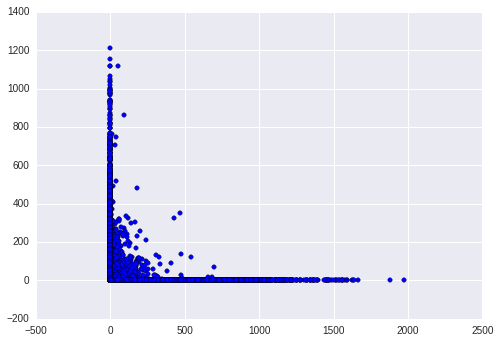

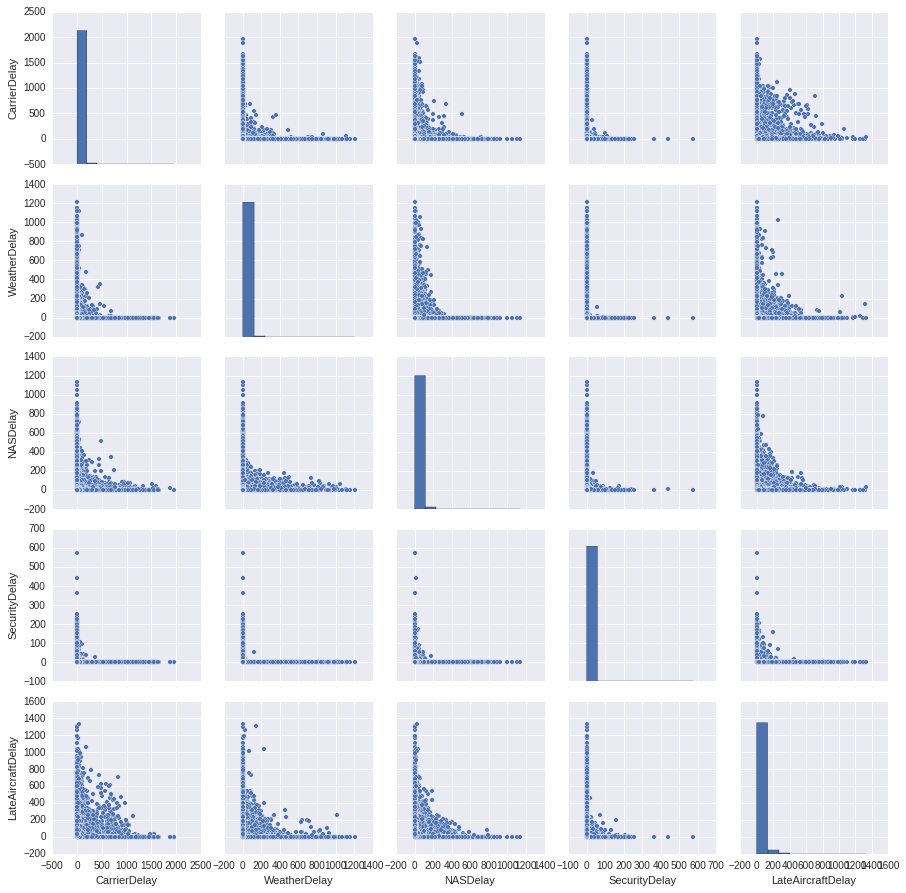

In [55]:
plt.scatter(DelayInfoOnly_stats['CarrierDelay'],DelayInfoOnly_stats['WeatherDelay'])
sns.pairplot(DelayInfoOnly_stats)

In [60]:
plt.savefig('test.png',dpi=160)
#plt.savefig('zoomed_ArrivalDelayBreakdown_19busiestAirports_2014.svg',dpi=160)
